<a href="https://colab.research.google.com/github/Jenishhd/DL_Project/blob/main/DL_Animals_Model_Chloe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import cv2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Csulb/Spring 2022 (Last Semester!)/CECS 456 Machine Learning/CECS456_Project/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(os.listdir('/content/raw-img/'))

12

In [ ]:
print("dogs",len(os.listdir('/content/raw-img/cane')))
print("horse",len(os.listdir('/content/raw-img/cavallo')))
print("elefant",len(os.listdir('/content/raw-img/elefante')))
print("butterfly",len(os.listdir('/content/raw-img/farfalla')))
print("chicken",len(os.listdir('/content/raw-img/gallina')))
print("cat",len(os.listdir('/content/raw-img/gatto')))
print("cow",len(os.listdir('/content/raw-img/mucca')))
print("sheep",len(os.listdir('/content/raw-img/pecora')))
print("spider",len(os.listdir('/content/raw-img/ragno')))
print("squirrel",len(os.listdir('/content/raw-img/scoiattolo')))

dogs 4863
horse 2623
elefant 1446
butterfly 2112
chicken 3098
cat 1668
cow 1866
sheep 1820
spider 4821
squirrel 1862


In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

#Splitting into train and test
import shutil

rootdir= '/content/raw-img' #path of the original folder

classes = ['cane', 'cavallo', 'elefante','farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

In [ ]:
for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i
  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.25

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

FileExistsError: ignored

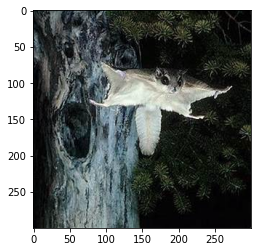

In [ ]:

#add to train 
allTrain = []


count = 0
for i in classes:
  rootdir= '/content/raw-img/train'
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)
  # print(len(allFileNames))
  for name in allFileNames:
    try:
        img = cv2.imread(os.path.join(source, name))
        # print(os.path.join(source, name))
        resized_img = cv2.resize(img, (224,224))
        #X_train_full.append(resized_img)
        allTrain.append([resized_img,count])
        plt.imshow(img)
    except Exception as e:
        pass
    #y_train_full.append(i)
  count += 1

# X_test = []
# y_test = []
allTest = []
#add to test
count = 0
for i in classes:
  rootdir= '/content/raw-img/test'
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)

  for name in allFileNames:
    try:
        img = cv2.imread(os.path.join(source, name))
        resized_img = cv2.resize(img, (224,224))
        # X_test.append(resized_img)
        allTest.append([resized_img,count])
        # plt.imshow(img)
    except Exception as e:
        pass
    # y_test.append(i)
  count += 1

In [ ]:
random.shuffle(allTrain)
X_train_full = []
y_train_full = []

print(allTrain[0])
for x, y in allTrain:
  X_train_full.append(x)
  y_train_full.append(y)

random.shuffle(allTest)
X_test = []
y_test = []

for x,y in allTest:
  X_test.append(x)
  y_test.append(y)

[array([[[ 8, 11, 19],
        [ 8, 11, 19],
        [ 8, 11, 19],
        ...,
        [14, 20, 31],
        [14, 20, 31],
        [14, 20, 31]],

       [[ 6,  9, 17],
        [ 6,  9, 17],
        [ 6,  9, 17],
        ...,
        [14, 20, 31],
        [14, 20, 31],
        [14, 20, 31]],

       [[ 5,  8, 16],
        [ 5,  8, 16],
        [ 5,  8, 16],
        ...,
        [15, 21, 32],
        [15, 21, 32],
        [15, 21, 32]],

       ...,

       [[36, 50, 78],
        [34, 48, 76],
        [33, 47, 75],
        ...,
        [31, 41, 59],
        [30, 40, 58],
        [30, 40, 58]],

       [[39, 53, 81],
        [37, 51, 79],
        [36, 50, 78],
        ...,
        [32, 41, 61],
        [32, 41, 60],
        [32, 42, 60]],

       [[53, 65, 93],
        [39, 51, 79],
        [43, 55, 83],
        ...,
        [31, 42, 64],
        [31, 42, 63],
        [43, 54, 74]]], dtype=uint8), 8]


In [ ]:
# import random


for i in y_train_full[:10]:
    print(i)
print(len(X_train_full))
#print(X_train_full[0])


8
5
4
7
7
8
1
1
4
0
19631


In [ ]:
X_train_full = np.array(X_train_full).reshape(-1, 224,224, 3)

In [ ]:
y_train_full = np.array(y_train_full)

In [ ]:
X_test = np.array(X_test).reshape(-1, 224,224, 3)
y_test = np.array(y_test)

In [ ]:
print(type(X_train_full),X_train_full.shape)
print(type(y_train_full),y_train_full.shape)

<class 'numpy.ndarray'> (19631, 224, 224, 3)
<class 'numpy.ndarray'> (19631,)


In [ ]:
X_train, X_valid = X_train_full[:-3000], X_train_full[-3000:] #take last 5000 elements for validation (slicing)
y_train, y_valid = y_train_full[:-3000], y_train_full[-3000:] #^  
X_test = X_test


In [ ]:
X_train_full.shape

(19631, 224, 224, 3)

In [ ]:
y_train

array([8, 5, 4, ..., 6, 0, 8])

In [ ]:
X_train_full[0]

array([[[ 8, 11, 19],
        [ 8, 11, 19],
        [ 8, 11, 19],
        ...,
        [14, 20, 31],
        [14, 20, 31],
        [14, 20, 31]],

       [[ 6,  9, 17],
        [ 6,  9, 17],
        [ 6,  9, 17],
        ...,
        [14, 20, 31],
        [14, 20, 31],
        [14, 20, 31]],

       [[ 5,  8, 16],
        [ 5,  8, 16],
        [ 5,  8, 16],
        ...,
        [15, 21, 32],
        [15, 21, 32],
        [15, 21, 32]],

       ...,

       [[36, 50, 78],
        [34, 48, 76],
        [33, 47, 75],
        ...,
        [31, 41, 59],
        [30, 40, 58],
        [30, 40, 58]],

       [[39, 53, 81],
        [37, 51, 79],
        [36, 50, 78],
        ...,
        [32, 41, 61],
        [32, 41, 60],
        [32, 42, 60]],

       [[53, 65, 93],
        [39, 51, 79],
        [43, 55, 83],
        ...,
        [31, 42, 64],
        [31, 42, 63],
        [43, 54, 74]]], dtype=uint8)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

In [ ]:
def Inception(inputlyr, filters1, filters2_convlyr1, filters2_convlyr3, filters3_convlyr1, filters3_convlyr5, filters4,name): 

  # 1st path:
  p1 = Conv2D(filters=filters1, kernel_size = (1,1), padding = 'same', activation = 'relu')(inputlyr)

  # 2nd path
  p2 = Conv2D(filters = filters2_convlyr1, kernel_size = (1,1), padding = 'same', activation = 'relu')(inputlyr)
  p2 = Conv2D(filters = filters2_convlyr3, kernel_size = (3,3), padding = 'same', activation = 'relu')(p2)

  # 3rd path
  p3 = Conv2D(filters = filters3_convlyr1, kernel_size = (1,1), padding = 'same', activation = 'relu')(inputlyr)
  p3 = Conv2D(filters = filters3_convlyr5, kernel_size = (5,5), padding = 'same', activation = 'relu')(p3)

  # 4th path
  p4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(inputlyr)
  p4 = Conv2D(filters = filters4, kernel_size = (1,1), padding = 'same', activation = 'relu')(p4)

  output = concatenate([p1, p2, p3, p4], axis = 3, name=name)

  return output

In [ ]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  x = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'same', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  x = MaxPooling2D(pool_size = (3,3), strides = 2)(x)

  # convolutional layer: filters = 64, strides = 1
  x = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(x)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  x = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)

  # max-pooling layer: pool_size = (3,3), strides = 2
  x = MaxPooling2D(pool_size= (3,3), strides = 2)(x)

  # 1st inception module
  x = Inception(x, filters1 = 64, 
                filters2_convlyr1 = 96, 
                filters2_convlyr3 = 128, 
                filters3_convlyr1 = 16, 
                filters3_convlyr5 = 32, 
                filters4 = 32,
                name='inception_1')

  # 2nd inception module
  x = Inception(x, 
                filters1 = 128, 
                filters2_convlyr1 = 128, 
                filters2_convlyr3 = 192, 
                filters3_convlyr1 = 32, 
                filters3_convlyr5 = 96, 
                filters4 = 64,
                name='inception_2')

  # max-pooling layer: pool_size = (3,3), strides = 2
  x = MaxPooling2D(pool_size= (3,3), strides = 2)(x)

  # 3rd inception module
  x = Inception(x, 
                filters1 = 192, 
                filters2_convlyr1 = 96, 
                filters2_convlyr3 = 208, 
                filters3_convlyr1 = 16, 
                filters3_convlyr5 = 48, 
                filters4 = 64,
                name='inception_3a')

  # Extra network 1:
  aux1 = AveragePooling2D(pool_size = (5,5), strides = 3)(x)
  aux1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(aux1)
  aux1 = Flatten()(aux1)
  aux1 = Dense(1024, activation = 'relu')(aux1)
  aux1 = Dropout(0.7)(aux1)
  aux1 = Dense(10, activation = 'softmax',name='aux_output_1')(aux1)

  
  # 4th inception module
  x = Inception(x, 
                filters1 = 160, 
                filters2_convlyr1 = 112, 
                filters2_convlyr3 = 224, 
                filters3_convlyr1 = 24, 
                filters3_convlyr5 = 64, 
                filters4 = 64,
                name='inception_4')

  # 5th inception module
  x = Inception(x, 
                filters1 = 128, 
                filters2_convlyr1 = 128, 
                filters2_convlyr3 = 256, 
                filters3_convlyr1 = 24, 
                filters3_convlyr5 = 64, 
                filters4 = 64,
                name='inception_5')

  # 6th inception module
  x = Inception(x, 
                filters1 = 112, 
                filters2_convlyr1 = 144, 
                filters2_convlyr3 = 288, 
                filters3_convlyr1 = 32, 
                filters3_convlyr5 = 64, 
                filters4 = 64,
                name='inception_6')

  # Extra network 2:
  aux2 = AveragePooling2D(pool_size = (5,5), strides = 3)(x)
  aux2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(aux2)
  aux2 = Flatten()(aux2)
  aux2 = Dense(1024, activation = 'relu')(aux2)
  aux2 = Dropout(0.7)(aux2)
  aux2 = Dense(10, activation = 'softmax', name='aux_output_2')(aux2)
  
  
  # 7th inception module
  x = Inception(x, 
                filters1 = 256, 
                filters2_convlyr1 = 160, 
                filters2_convlyr3 = 320, 
                filters3_convlyr1 = 32, 
                filters3_convlyr5 = 128, 
                filters4 = 128,
                name='inception_7')

  # max-pooling layer: pool_size = (3,3), strides = 2
  x = MaxPooling2D(pool_size = (3,3), strides = 2)(x)

  # 8th inception module
  x = Inception(x, 
                filters1 = 256, 
                filters2_convlyr1 = 160, 
                filters2_convlyr3 = 320, 
                filters3_convlyr1 = 32, 
                filters3_convlyr5 = 128, 
                filters4 = 128,
                name='inception_8')

  # 9th inception module
  # x = Inception(x, 
  #               filters1 = 384, 
  #               filters2_convlyr1 = 192, 
  #               filters2_convlyr3 = 384, 
  #               filters3_convlyr1 = 48, 
  #               filters3_convlyr5 = 128, 
  #               filters4 = 128,
  #               name='inception_9')

  # Global Average pooling layer 
  x = GlobalAveragePooling2D(name = 'GAPL')(x)

  # Dropoutlayer 
  x = Dropout(0.5)(x)

  # output layer 
  x = Dense(10, activation = 'softmax')(x)
  
  # model
  model = Model(input_layer, [x, aux1, aux2], name = 'GoogLeNet')

  return model

In [ ]:
cnn = GoogLeNet()

In [ ]:
cnn.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 55, 55, 64)   0           ['conv2d[0][0]']                 
                                                                                          

In [ ]:
cnn.compile(loss=["sparse_categorical_crossentropy","sparse_categorical_crossentropy","sparse_categorical_crossentropy"],
            loss_weights=[1, 0.3, 0.3],
            optimizer="adam",
            metrics=["accuracy"])
# from tensorflow.keras.optimizers import Adam
# opt = Adam(lr=0.001)
# cnn.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#cnn.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
            # loss_weights=[1, 0.3, 0.3], 
           

In [ ]:
history = cnn.fit(X_train, y_train, batch_size = 70, epochs=35, validation_data=(X_valid, y_valid)) 

Epoch 1/35
238/238 [==============================] - 52s 149ms/step - loss: 3.5853 - dense_2_loss: 2.2334 - aux_output_1_loss: 2.2845 - aux_output_2_loss: 2.2218 - dense_2_accuracy: 0.1902 - aux_output_1_accuracy: 0.1987 - aux_output_2_accuracy: 0.1876 - val_loss: 3.4211 - val_dense_2_loss: 2.1365 - val_aux_output_1_loss: 2.1445 - val_aux_output_2_loss: 2.1374 - val_dense_2_accuracy: 0.2207 - val_aux_output_1_accuracy: 0.2393 - val_aux_output_2_accuracy: 0.2207
Epoch 2/35
238/238 [==============================] - 32s 136ms/step - loss: 3.3445 - dense_2_loss: 2.1009 - aux_output_1_loss: 2.0691 - aux_output_2_loss: 2.0762 - dense_2_accuracy: 0.2423 - aux_output_1_accuracy: 0.2737 - aux_output_2_accuracy: 0.2641 - val_loss: 3.1098 - val_dense_2_loss: 1.9533 - val_aux_output_1_loss: 1.9356 - val_aux_output_2_loss: 1.9193 - val_dense_2_accuracy: 0.3043 - val_aux_output_1_accuracy: 0.3303 - val_aux_output_2_accuracy: 0.3243
Epoch 3/35
238/238 [==============================] - 32s 136ms/st

# **Evaluation**

In [ ]:
score = cnn.evaluate(X_test, y_test)

205/205 [==============================] - 6s 29ms/step - loss: 2.3650 - dense_2_loss: 1.5201 - aux_output_1_loss: 1.3251 - aux_output_2_loss: 1.4910 - dense_2_accuracy: 0.7071 - aux_output_1_accuracy: 0.7150 - aux_output_2_accuracy: 0.7169


In [ ]:
print('Total loss on Testing Set:', score[0])

Total loss on Testing Set: 2.3649725914001465


In [ ]:
print('Accuracy of Testing Set:', score[6])

Accuracy of Testing Set: 0.7168601155281067


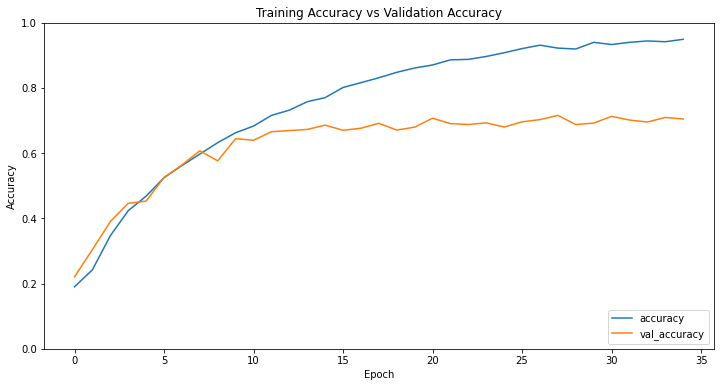

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['dense_2_accuracy'], label='accuracy')
plt.plot(history.history['val_dense_2_accuracy'], label = 'val_accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

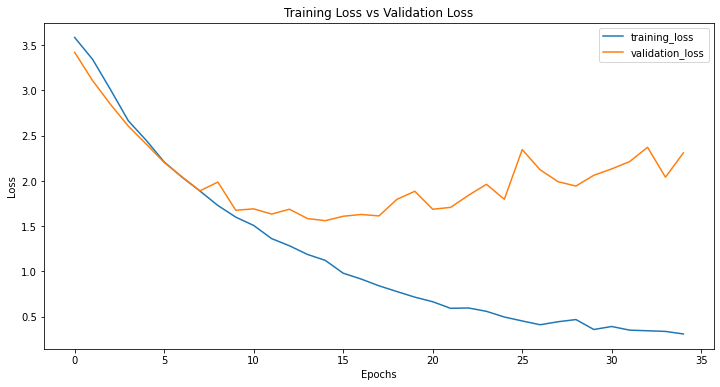

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training Loss vs Validation Loss')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

In [ ]:
cnn.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [ ]:
X_new = X_test[:3]
y_proba = cnn.predict(X_new)
y_proba[0].round(2)
#y_proba

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , 0.  , 0.01, 0.83, 0.  , 0.  , 0.  , 0.1 ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.54, 0.45, 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_proba[1].round(2)

array([[0.95, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.01, 0.14, 0.08, 0.05, 0.01, 0.06, 0.34, 0.05, 0.2 ],
       [0.13, 0.02, 0.  , 0.  , 0.01, 0.  , 0.7 , 0.14, 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_proba[2].round(2)

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.94],
       [0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.87, 0.12, 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(cnn.predict(X_new), axis=-1)
y_pred

array([[0, 5, 6],
       [0, 7, 6],
       [0, 9, 6]])

In [ ]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "ragno": "spider", "spider": "ragno", "squirrel": "scoiattolo"}

In [ ]:
np.array(classes)[y_pred]

array([['cane', 'gatto', 'mucca'],
       ['cane', 'pecora', 'mucca'],
       ['cane', 'scoiattolo', 'mucca']], dtype='<U10')

In [ ]:
y_new = y_test[:3]
y_new

array([0, 2, 6])

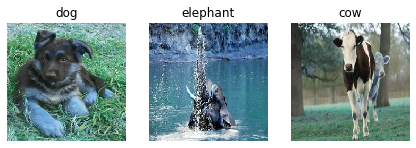

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(translate[classes[y_test[index]]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()